In [8]:
# ==========================================
# 📦 DATA HANDLING & NUMERIEKE BIBLIOTHEKEN
# ==========================================
import numpy as np
import pandas as pd

# ==========================================
# 📊 VISUALISATIE
# ==========================================
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.cm as cm
import plotly

# Stijl instellen
sns.set_style('darkgrid')

# ==========================================
# ⚙️ PREPROCESSING
# ==========================================
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# ==========================================
# 🤖 CLUSTERING
# ==========================================
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN
import hdbscan  # Installeren met: pip install hdbscan

# Hiërarchisch clusteren
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

# ==========================================
# 📉 DIMENSIONALITEITSREDUCTIE
# ==========================================
from sklearn.manifold import TSNE
import umap  # Installeren met: pip install umap-learn

# ==========================================
# 🧪 SYNTHETISCHE DATA GENERATIE
# ==========================================
from sklearn.datasets import make_blobs, make_circles, make_gaussian_quantiles, make_moons

# ==========================================
# 📏 EVALUATIE-METRICS
# ==========================================
from sklearn.metrics import (
    davies_bouldin_score,
    silhouette_score,
    silhouette_samples,
    adjusted_rand_score
)

# ==========================================
# 🔁 BOOTSTRAPPING
# ==========================================
from sklearn.utils import resample

# ==========================================
# 📊 STATISTISCHE TESTEN
# ==========================================
from scipy.stats import (
    chi2_contingency,
    kruskal,
    pearsonr,
    multivariate_normal
)

# ==========================================
# 🎯 MODEL TUNING
# ==========================================
from sklearn.mixture import GaussianMixture
import optuna


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


In [2]:
try:
    df_heel = pd.read_excel(r"C:\Users\mitch\OneDrive\Documenten\Studie-Toegepaste-wiskunde\statistiek\stat5\Opdracht 2\fitness.xlsx")
except:
    df_heel = pd.read_csv(r"C:\Users\lucas\OneDrive\Jaar 5\Stat5\college_math.csv")
    


In [3]:
df_heel

,jaar,provincie,stad,leeftijd,geslacht,lengte_cm,gewicht_kg,sport_per_week,reistijd_min,vervoer,renafstand_m,situps_1min,pushups_1min,pullup_sec,spronghoogte_cm,fitness_score
0,2000,Drenthe,Hoogeveen,12,male,160,46.6,4,26,walking,2098,30,15,12,25,51
1,2000,Drenthe,Assen,12,female,154,33.9,1,26,public transport,1695,15,14,3,25,41
2,2000,Drenthe,Hoogeveen,12,male,156,44.4,0,34,public transport,1147,10,1,2,20,12
3,2000,Drenthe,Emmen,11,male,150,35.0,0,28,public transport,1413,7,3,1,18,15
4,2000,Drenthe,Emmen,12,female,158,45.5,5,5,bike,2400,33,24,19,45,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2020,Zuid-Holland,Zoetermeer,12,male,149,43.2,7,20,bike,2880,35,30,29,45,92
29996,2020,Zuid-Holland,Rotterdam,11,female,161,43.8,7,13,walking,2321,44,24,19,39,88
29997,2020,Zuid-Holland,Alphen aan den Rijn,12,female,151,46.0,7,18,walking,2320,30,18,16,45,81
29998,2020,Zuid-Holland,Leiden,12,female,154,42.7,2,30,public transport,1740,15,9,3,29,41


In [4]:
results = []

for col in df_heel.columns:
    if col == "fitness_score":
        continue
    
    # Numerieke kolommen
    if pd.api.types.is_numeric_dtype(df_heel[col]) and df_heel[col].nunique() > 2:
        # Pearson correlatie
        corr, p = pearsonr(df_heel[col], df_heel["fitness_score"])
        results.append({
            "Variable": col,
            "Type": "Numeric",
            "Test": "Pearson",
            "p-value": p
        })
    else:
        # Dummy of categorisch → Kruskal-Wallis
        groups = [df_heel["fitness_score"][df_heel[col] == val] for val in df_heel[col].unique()]
        stat, p = kruskal(*groups)
        results.append({
            "Variable": col,
            "Type": "Categorical/Dummy",
            "Test": "Kruskal-Wallis",
            "p-value": p
        })

# Resultaten in DataFrame
results_df = pd.DataFrame(results)

# Sorteren op p-value (laagste eerst)
results_df = results_df.sort_values("p-value").reset_index(drop=True)

print(results_df)

           Variable               Type            Test        p-value
0    sport_per_week            Numeric         Pearson   0.000000e+00
1      reistijd_min            Numeric         Pearson   0.000000e+00
2           vervoer  Categorical/Dummy  Kruskal-Wallis   0.000000e+00
3      renafstand_m            Numeric         Pearson   0.000000e+00
4       situps_1min            Numeric         Pearson   0.000000e+00
5      pushups_1min            Numeric         Pearson   0.000000e+00
6        pullup_sec            Numeric         Pearson   0.000000e+00
7   spronghoogte_cm            Numeric         Pearson   0.000000e+00
8         provincie  Categorical/Dummy  Kruskal-Wallis  3.355604e-172
9              stad  Categorical/Dummy  Kruskal-Wallis  2.753194e-151
10             jaar            Numeric         Pearson   2.133199e-30
11       gewicht_kg            Numeric         Pearson   1.643220e-04
12        lengte_cm            Numeric         Pearson   2.480409e-02
13         geslacht 

In [5]:
df = df_heel.drop(columns=["provincie", "gewicht_kg", "lengte_cm","geslacht", "leeftijd"])

In [6]:
df

,jaar,stad,sport_per_week,reistijd_min,vervoer,renafstand_m,situps_1min,pushups_1min,pullup_sec,spronghoogte_cm,fitness_score
0,2000,Hoogeveen,4,26,walking,2098,30,15,12,25,51
1,2000,Assen,1,26,public transport,1695,15,14,3,25,41
2,2000,Hoogeveen,0,34,public transport,1147,10,1,2,20,12
3,2000,Emmen,0,28,public transport,1413,7,3,1,18,15
4,2000,Emmen,5,5,bike,2400,33,24,19,45,89
...,...,...,...,...,...,...,...,...,...,...,...
29995,2020,Zoetermeer,7,20,bike,2880,35,30,29,45,92
29996,2020,Rotterdam,7,13,walking,2321,44,24,19,39,88
29997,2020,Alphen aan den Rijn,7,18,walking,2320,30,18,16,45,81
29998,2020,Leiden,2,30,public transport,1740,15,9,3,29,41


In [7]:
def boxplot_doelvar(label, df, title):
    df = df.copy()
    df['Cluster'] = label
    titel = title
    # Selecteer relevante kolommen en zet ze in long-form
    features = ['grade_final', 'grade_period1', 'grade_period2']
    df_melted = df.melt(id_vars='Cluster', value_vars=features, var_name='Feature', value_name='Score')
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Feature', y='Score', hue='Cluster', data=df_melted, palette='Set1')
    plt.title(titel)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
def objective2(trial):
    n_components = trial.suggest_int("n_components", 1, 10)
    covariance_type = trial.suggest_categorical("covariance_type", ["full", "diag", "tied", "spherical"])
    reg_covar = trial.suggest_float("reg_covar", 1e-6, 1e-2, log=True)

    categorical_features = ['stad', 'vervoer']
    numerical_features = [
    'jaar', 'sport_per_week', 'reistijd_min', 'renafstand_m',
    'situps_1min', 'pushups_1min', 'pullup_sec', 'spronghoogte_cm',
    'fitness_score'
]

    # 🔹 Stap 2: preprocessing pipeline
    preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

    # 🔹 Stap 3: pas preprocessing toe op df
    X_processed = preprocessor.fit_transform(df)

    # 🔹 Stap 4: dimensiereductie (optioneel)
    pca = PCA(n_components=5)
    X_reduced = pca.fit_transform(X_processed)

# 🔹 Stap 5: clustering met GMM
    gmm = GaussianMixture(n_components=3)
    
    
    gmm_model = GaussianMixture(n_components=n_components, covariance_type=covariance_type, reg_covar=reg_covar)
    gmm_model.fit(df)
    return gmm_model.bic(df)

# maak Optuna-study met deze procedure aan
study2 = optuna.create_study(direction="minimize")


# voer Optuna grid search uit
optuna.logging.disable_default_handler() # optioneel: voorkom output per study
study2.optimize(objective2, n_trials=1000)

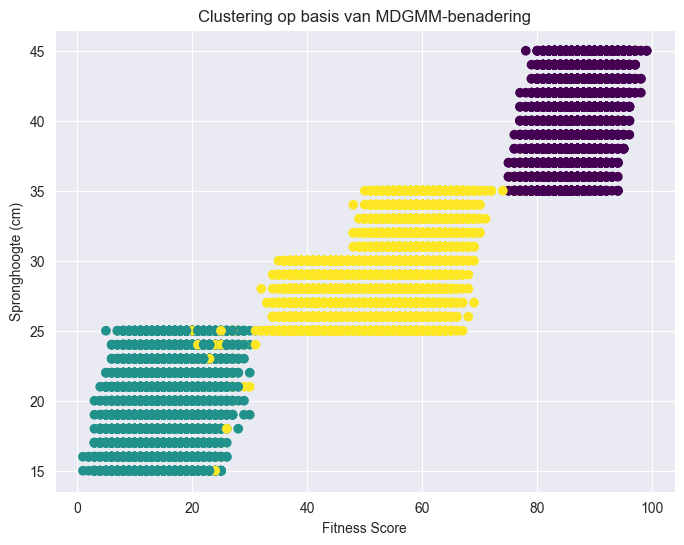

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 🔹 Stap 1: definieer categorische en numerieke kolommen
categorical_features = ['stad', 'vervoer']
numerical_features = [
    'jaar', 'sport_per_week', 'reistijd_min', 'renafstand_m',
    'situps_1min', 'pushups_1min', 'pullup_sec', 'spronghoogte_cm',
    'fitness_score'
]

# 🔹 Stap 2: preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

# 🔹 Stap 3: pas preprocessing toe op df
X_processed = preprocessor.fit_transform(df)

# 🔹 Stap 4: dimensiereductie (optioneel)
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_processed)

# 🔹 Stap 5: clustering met GMM
gmm = GaussianMixture(n_components=3)
clusters = gmm.fit_predict(X_reduced)

# 🔹 Stap 6: voeg clusterlabels toe aan df
df['cluster'] = clusters

# 🔹 Stap 7: visualisatie van clusters op fitness_score
plt.figure(figsize=(8, 6))
plt.scatter(df['fitness_score'], df['spronghoogte_cm'], c=df['cluster'], cmap='viridis')
plt.xlabel('Fitness Score')
plt.ylabel('Spronghoogte (cm)')
plt.title('Clustering op basis van MDGMM-benadering')
plt.show()

In [ ]:
# bekijk optimalisatieproces
optuna.visualization.plot_optimization_history(study2)

In [ ]:
optuna.visualization.plot_slice(study2)

In [ ]:
best_params2 = study2.best_params
best_params2

In [ ]:
def bootstrap_gmm_stability(X, scaler=None, n_bootstraps=100, gmm_params=None):
    n_components = gmm_params.get("n_components", 6)
    covariance_type = gmm_params.get("covariance_type", "diag")
    reg_covar = gmm_params.get("reg_covar", 1e-6)

    all_weights = []

    for i in range(n_bootstraps):
        X_resampled = resample(X, replace=True, random_state=i)

        if scaler is not None:
            X_resampled = scaler().fit_transform(X_resampled)

        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, reg_covar=reg_covar)

        gmm.fit(X_resampled)
        all_weights.append(gmm.weights_)

    return np.array(all_weights)

In [ ]:
weights_matrix2 = bootstrap_gmm_stability(df, scaler=MinMaxScaler, n_bootstraps=500, gmm_params=best_params2)

In [ ]:
# visualiseer gewichten
sns.boxplot(data=weights_matrix2)
plt.xlabel("Component")
plt.ylabel("Mixing coefficient (pi_k)")
plt.title("Bootstrapped stability of GMM weights")
plt.axhline(0.01, linestyle = 'dashed', color = 'red')
plt.show()

In [ ]:
best_gmm2 = GaussianMixture(n_components=6, covariance_type=best_params2['covariance_type'], reg_covar=best_params2['reg_covar'])
best_gmm2.fit(df)

In [ ]:
# pas hard clustering toe op basis van GMM
labels_GMM_2var = best_gmm2.predict(df)

# voeg clusterlabels toe aan de data
input_data = df.copy()
input_data.loc[:,'Cluster'] = labels_GMM_2var

# pairplot
sns.pairplot(
    data=input_data,
    vars=['school_absences','weekly_study_hours'],
    hue='Cluster',
    palette="Set1",
    diag_kind="kde",
)
plt.suptitle("GMM - hard clustering", y=1.02)
plt.show()


In [ ]:
boxplot_doelvar(labels_GMM_2var, df_heel, "Distributie van cijfers per cluster, clusters gemaakt met GMM")